# House price (prevendo preço das casas)

#resolvendo problema de regressão com linguagem python
by: kedimo

In [138]:
#importando bibliotecas úteis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
#carregando Arquivo csv como DataFrame
df = pd.read_csv('data.csv')

In [140]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [141]:
#verificando numero de linhas e colunas
df.shape

(4600, 18)

In [142]:
#resumo do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [143]:
#colunas do meu DataFrame
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [144]:
#arredondando meus dados
np.round(df.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [145]:
#buscando elementos
df['date'].unique()

array(['2014-05-02 00:00:00', '2014-05-03 00:00:00',
       '2014-05-04 00:00:00', '2014-05-05 00:00:00',
       '2014-05-06 00:00:00', '2014-05-07 00:00:00',
       '2014-05-08 00:00:00', '2014-05-09 00:00:00',
       '2014-05-10 00:00:00', '2014-05-11 00:00:00',
       '2014-05-12 00:00:00', '2014-05-13 00:00:00',
       '2014-05-14 00:00:00', '2014-05-15 00:00:00',
       '2014-05-16 00:00:00', '2014-05-17 00:00:00',
       '2014-05-18 00:00:00', '2014-05-19 00:00:00',
       '2014-05-20 00:00:00', '2014-05-21 00:00:00',
       '2014-05-22 00:00:00', '2014-05-23 00:00:00',
       '2014-05-24 00:00:00', '2014-05-25 00:00:00',
       '2014-05-26 00:00:00', '2014-05-27 00:00:00',
       '2014-05-28 00:00:00', '2014-05-29 00:00:00',
       '2014-05-30 00:00:00', '2014-05-31 00:00:00',
       '2014-06-01 00:00:00', '2014-06-02 00:00:00',
       '2014-06-03 00:00:00', '2014-06-04 00:00:00',
       '2014-06-05 00:00:00', '2014-06-06 00:00:00',
       '2014-06-07 00:00:00', '2014-06-08 00:0

In [146]:
#visualização e pré-processamento de dados

In [147]:
#mostrando 2 primeiras linhas 
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


<AxesSubplot:xlabel='price'>

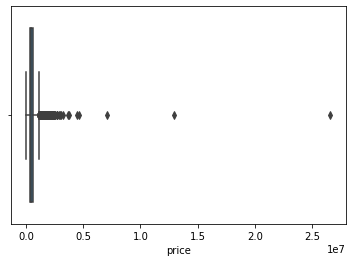

In [148]:
sns.boxplot(x=df['price'], data=df)

In [149]:
#Como podemos ver, há muitos outliers presentes no conjunto de dados. Então, vamos tentar remover os outliers.

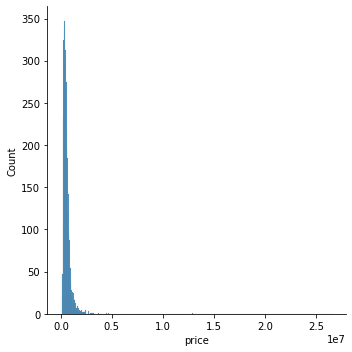

In [150]:
sns.displot(x=df['price'])

In [151]:
def remover_outliers(df, x):
   #definindo limites
        q25 = np.percentile(df[x], 25)
        q75 = np.percentile(df[x], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        lower, upper = 1, (q75 + cut_off)
        df = df[(df[x] < upper) & (df[x] > lower)]
        print(f"Outliers de {x} foram removidos\n")
        return df

In [152]:
df = remover_outliers(df, 'price')

Outliers de price foram removidos



In [153]:
#Outliers foram removidos

In [154]:
df.shape

(4311, 18)

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4311.0,487456.901904,215659.641022,7800.0,320000.00,450000.00,615000.0,1150000.00
bedrooms,4311.0,3.351659,0.881215,0.0,3.00,3.00,4.0,9.00
bathrooms,4311.0,2.094352,0.715171,0.0,1.75,2.25,2.5,5.75
sqft_living,4311.0,2030.697982,810.138266,370.0,1430.00,1920.00,2510.0,7320.00
sqft_lot,4311.0,14598.596149,36141.110719,638.0,5000.00,7566.00,10696.5,1074218.00
floors,4311.0,1.495129,0.536898,1.0,1.00,1.50,2.0,3.50
waterfront,4311.0,0.003711,0.060815,0.0,0.00,0.00,0.0,1.00
view,4311.0,0.173742,0.644964,0.0,0.00,0.00,0.0,4.00
condition,4311.0,3.443749,0.669194,1.0,3.00,3.00,4.0,5.00
sqft_above,4311.0,1747.008583,763.543329,370.0,1170.00,1540.00,2190.0,7320.00


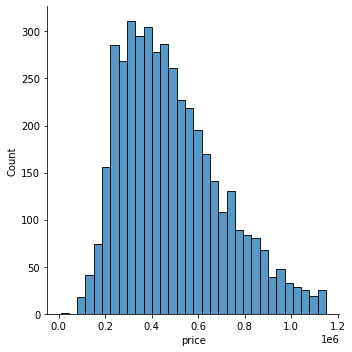

In [156]:
sns.displot(x=df['price'])

In [157]:
#convertendo o tipo de data em datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].dtype

dtype('<M8[ns]')

In [158]:
#agora, vamos extrair o ano e o mês da coluna de data e hora
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [159]:
#Aqui, podemos ver que todos os anos são do mesmo ano. Portanto, não é útil para nosso conjunto de dados. 
#Então, vamos remover as colunas 'year' e 'date' do nosso conjunto de dados.
df.drop(['year', 'date'], axis=1, inplace=True)

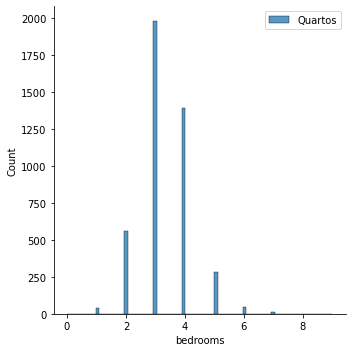

In [160]:
#Bedrooms (Quartos de dormir)
sns.displot(x=df['bedrooms'], label = "Quartos")
plt.legend()

In [161]:
df['bedrooms'].value_counts()

3.0    1981
4.0    1394
2.0     557
5.0     282
6.0      47
1.0      37
7.0      10
9.0       1
0.0       1
8.0       1
Name: bedrooms, dtype: int64

In [162]:
#Agora vamos remover os quartos que são 0 e mais de 8 ou 9. 
#Porque podem ser outliers para nosso conjunto de dados.

df = df[(df['bedrooms'] > 0) & (df['bedrooms'] < 8)]
df['bedrooms'] = df['bedrooms'].astype('int')
df['bedrooms'].value_counts()

3    1981
4    1394
2     557
5     282
6      47
1      37
7      10
Name: bedrooms, dtype: int64

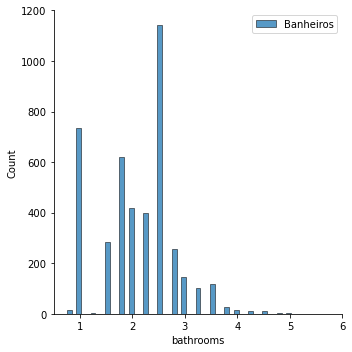

In [163]:
#bathrooms (banheiros)
sns.displot(x=df['bathrooms'], label = 'Banheiros')
plt.legend()

In [164]:
df['bathrooms'] = df['bathrooms'].astype('int')

In [165]:
#Floors (pisos)
df['floors'].value_counts()

1.0    2105
2.0    1640
1.5     415
3.0     120
2.5      27
3.5       1
Name: floors, dtype: int64

In [166]:
df['floors'] = df['floors'].astype('int')

In [167]:
#WaterFront
df['waterfront'].value_counts()

0    4292
1      16
Name: waterfront, dtype: int64

In [168]:
#Conditions (condições)
df['condition'].value_counts()

3    2702
4    1185
5     385
2      30
1       6
Name: condition, dtype: int64

<AxesSubplot:>

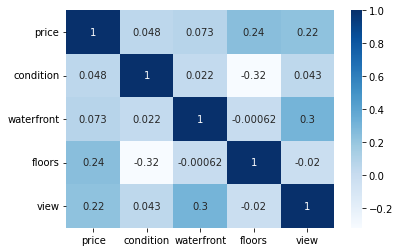

In [169]:
sns.heatmap(df[['price', 'condition', 'waterfront', 'floors', 'view']].corr(), annot=True, cmap="Blues")

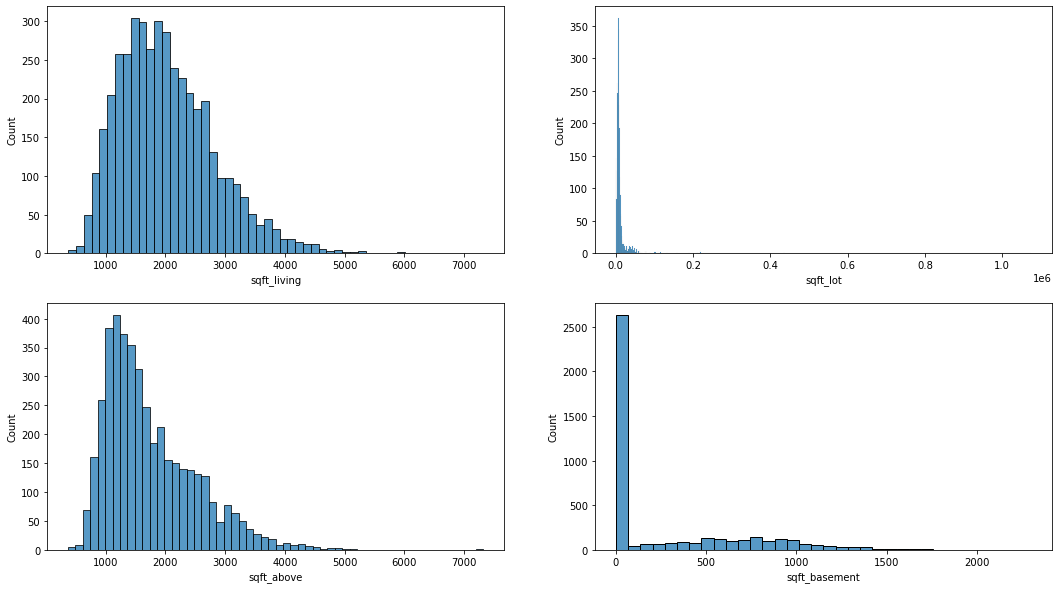

In [170]:
#"Sqrt_living", "sqft_lot", "sqrt_above", "sqrt_basement"

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0],x="sqft_living", data=data);
sns.histplot(ax=axes[0, 1],x="sqft_lot", data=data);
sns.histplot(ax=axes[1,0],x="sqft_above", data=data);
sns.histplot(ax=axes[1, 1],x="sqft_basement", data=data);

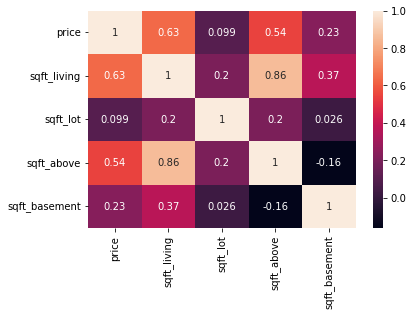

In [171]:
sns.heatmap(df[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]].corr(), annot=True);

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

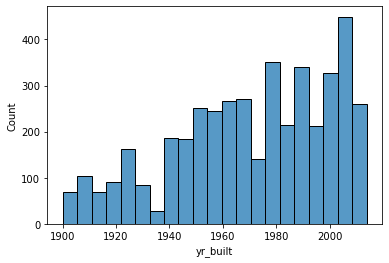

In [172]:
#Podemos depender apenas de "sqft_living", como o recurso mais eficaz com "price" e é altamente 
# correlacionado com "sqft_above".

#Year Built (ano de construção)

sns.histplot(x=df['yr_built'],data=data)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

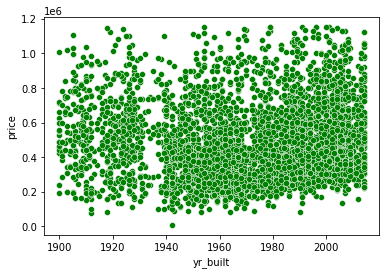

In [173]:
sns.scatterplot(x=df['yr_built'], y=df['price'], color='green')

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

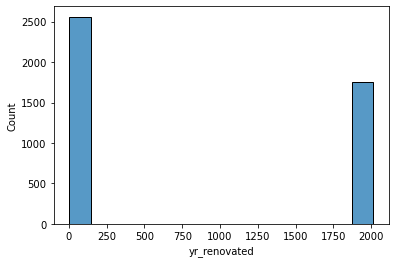

In [174]:
#Year Renovated (Ano de renovação)

sns.histplot(x=df['yr_renovated'], data=data)

In [175]:
#Vamos fazer isso como renovado ou não. Ou 0 ou 1.

df['yr_renovated'] = df['yr_renovated'].apply(lambda x: x if x == 0 else 1)

In [176]:
df['yr_renovated'].value_counts()

0    2559
1    1749
Name: yr_renovated, dtype: int64

In [177]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA,5
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1,9105 170th Ave NE,Redmond,WA 98052,USA,5
5,490000.0,2,1,880,6380,1,0,0,3,880,0,1938,1,522 NE 88th St,Seattle,WA 98115,USA,5


In [178]:
#Country (País)

df['country'].value_counts()

USA    4308
Name: country, dtype: int64

In [179]:
df['city'].value_counts()

Seattle                1459
Renton                  291
Bellevue                232
Redmond                 227
Kent                    183
Issaquah                183
Kirkland                176
Auburn                  175
Sammamish               166
Federal Way             145
Shoreline               120
Woodinville             111
Maple Valley             95
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
Mercer Island            50
North Bend               50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                31
Vashon                   29
SeaTac                   28
Tukwila                  28
Enumclaw                 27
Carnation                21
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill          

<AxesSubplot:xlabel='city'>

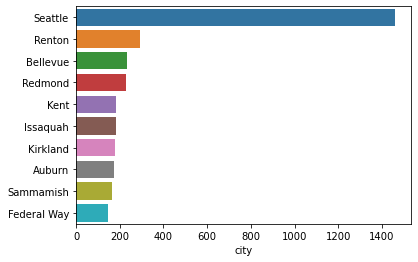

In [180]:
top_10_cidades = df['city'].value_counts().head(10)
sns.barplot(x = top_10_cidades, y=top_10_cidades.index)

In [181]:
#Como Podemos ver, a maioria das casas estão presentes na cidade de "Seattle".
df['statezip'].value_counts()

WA 98103    144
WA 98052    133
WA 98117    129
WA 98115    124
WA 98059    104
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64

In [182]:
# Aqui vamos deixar cair a coluna 'país', 
#já que todas as casas estão presentes apenas nos EUA. E a coluna 'Zip code'.

df.drop(['country', 'statezip', 'street'], axis=1, inplace=True)

In [183]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,month
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,1,Shoreline,5
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,5


In [184]:
#Manipulando os dados categóricos

df = pd.get_dummies(df, drop_first=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3,1,1340,7912,1,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2,1,880,6380,1,0,0,3,880,...,0,1,0,0,0,0,0,0,0,0


In [185]:
#Dividindo o conjunto de dados em X e Y

X = df.drop('price',axis=1)
y = df['price']

In [186]:
#Dividindo o conjunto de dados em treinamento e teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [188]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [189]:
#Criando modelo de ML

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy of training set:", lr.score(X_train, y_train))
print(f"Accuracy of testing set: ", lr.score(X_test, y_test))

Accuracy of training set: 0.6994372913476681
Accuracy of testing set:  0.6600697578812008


In [190]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10)
print(np.mean(cv))

0.6707203238233833
